# Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

## Images

In [2]:
nadia = cv2.imread("D:\\Deep learning\\OBJECT_DETECTION-20230619T173635Z-001\\OBJECT_DETECTION\\Nadia_Murad.jpg",0)
denis=cv2.imread("D:\\Deep learning\\OBJECT_DETECTION-20230619T173635Z-001\\OBJECT_DETECTION\\Denis_Mukwege.jpg",0)
solvay=cv2.imread("D:\\Deep learning\\OBJECT_DETECTION-20230619T173635Z-001\\OBJECT_DETECTION\\solvay_conference.jpg",0)

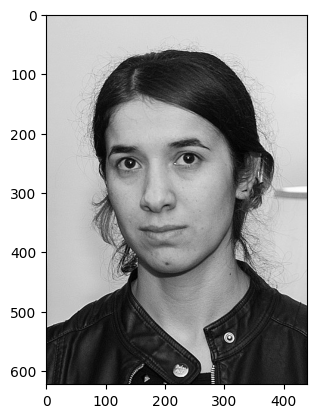

In [3]:
plt.imshow(nadia,cmap="gray")

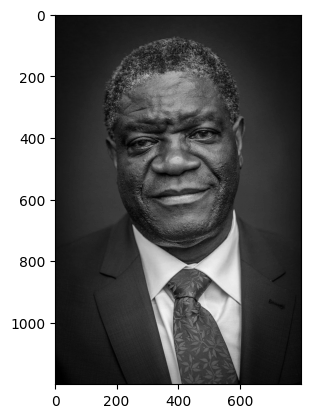

In [4]:
plt.imshow(denis,cmap='gray')

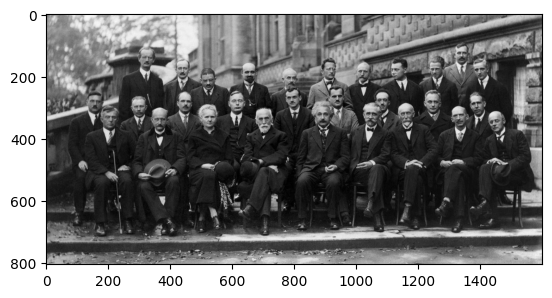

In [5]:
plt.imshow(solvay,cmap='gray')

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [6]:
face_cascade = cv2.CascadeClassifier('D:\\Deep learning\\OBJECT_DETECTION-20230619T173635Z-001\\OBJECT_DETECTION\haarcascades\\haarcascade_frontalface_alt.xml')

In [7]:
def detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img


[[ 79  33 106 106]]


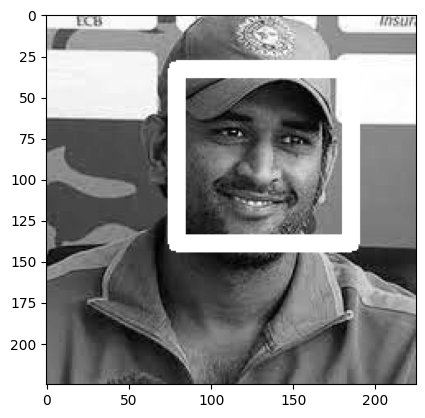

In [8]:
path="D:\\Deep learning\\images.jpg"
dhoni=cv2.imread(path,0)
detect=face_cascade.detectMultiScale(dhoni)
for (x,y,w,h) in detect:
    
    img= cv2.rectangle(dhoni, (x,y), (x+w,y+h),(255,255,255),10)
plt.imshow(img,cmap='gray')
print(detect)

In [9]:
result = detect_face(denis)

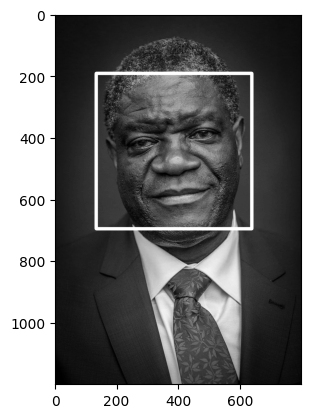

In [10]:
plt.imshow(result,cmap='gray')

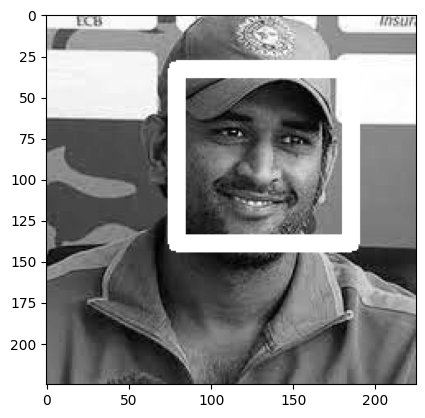

In [11]:
result = detect_face(dhoni)
plt.imshow(result,cmap="gray")

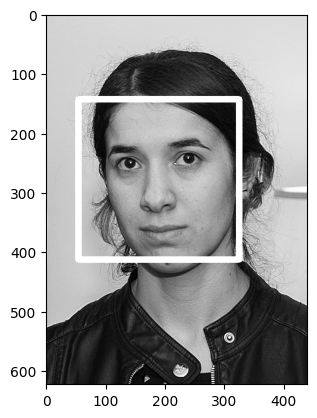

In [12]:
# Gets errors!
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

In [13]:
def adj_detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img


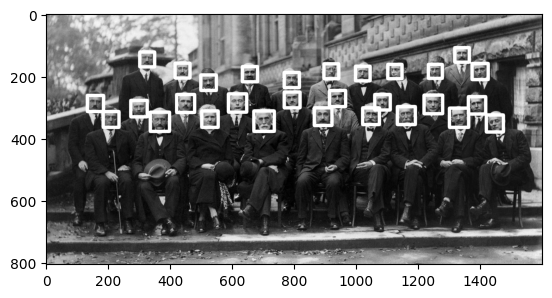

In [14]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

## Conjunction with Video

In [ ]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read(0)

    frame = detect_face(frame)

    cv2.imshow('video face', frame)

    if cv2.waitKey(25) & 0xFF==ord('q'):
             break

cap.release()
cv2.destroyAllWindows()

In [ ]:
ord('A')